In [2]:
import numpy as np
from scipy import stats
import pandas as pd
import statsmodels.api as sm

# 그래프 Visualization
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
mpl.rcParams['axes.unicode_minus'] = False
font_location = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_name = fm.FontProperties(fname = font_location).get_name()
mpl.rc('font',family= font_name)
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Decision tree 예측
from sklearn.tree import export_graphviz
import graphviz
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

#랜덤 포레스트
from sklearn.ensemble import RandomForestRegressor

#그래디언트 부스팅
from sklearn.ensemble import GradientBoostingRegressor

# 정규분포 및 회귀분석 등
from statsmodels.stats.proportion import proportions_ztest
from statsmodels.formula.api import ols
from statsmodels.api import qqplot, add_constant
import statsmodels.formula.api as smf
from statsmodels.tools.eval_measures import rmse

# KNN
from sklearn.neighbors import KNeighborsRegressor

### 분류
#로지스틱 회귀분석
from statsmodels.api import Logit

# Decision tree
from sklearn.tree import DecisionTreeClassifier

#평가함수
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

#스케일링
from sklearn.preprocessing import scale, minmax_scale, robust_scale
#다중공선성 확인
from statsmodels.stats.outliers_influence import variance_inflation_factor
#선형 회귀모형
from sklearn.linear_model import LinearRegression
#변수선택법 (후진제거법)
from sklearn.feature_selection import RFE
#스케일 변환 -> 표준화 회귀계수 산출
from sklearn.preprocessing import StandardScaler

In [6]:
df_raw = pd.read_csv("/home/pirl/Statistics/Day3_0715/IRIS.csv", engine = "python", encoding="CP949")
df_raw

,SEPAL_LENGTH,SEPAL_WIDTH,PETAL_LENGTH,PETAL_WIDTH,SPECIES
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [4]:
df_raw.isnull().sum(axis=0)

SEPAL_LENGTH    0
SEPAL_WIDTH     0
PETAL_LENGTH    0
PETAL_WIDTH     0
SPECIES         0
dtype: int64

In [133]:
obj_cols = df_raw.select_dtypes("object").columns
for col in obj_cols : 
    _n = len(df_raw[col].value_counts())
    print(col, ":", str(_n))

REASON : 2
JOB : 6


In [8]:
df_raw["SPECIES"] = np.where(df_raw['SPECIES'] == "setosa",0,np.where(df_raw['SPECIES'] == 'virginica',2,1))
df_raw.head()

,SEPAL_LENGTH,SEPAL_WIDTH,PETAL_LENGTH,PETAL_WIDTH,SPECIES
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [135]:
df_raw_dummy = pd.get_dummies(df_raw)
df_raw_dummy.head()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,1,1700,30548,40320.0,9.0,0,0.0,101.466002,1.0,8,37.113614,0,1,0,0,1,0,0,0
1,1,1800,28502,43034.0,11.0,0,0.0,88.766030,0.0,8,36.884894,0,1,0,0,1,0,0,0
2,0,2300,102370,120953.0,2.0,0,0.0,90.992533,0.0,13,31.588503,0,1,0,1,0,0,0,0
3,1,2400,34863,47471.0,12.0,0,0.0,70.491080,1.0,21,38.263601,0,1,1,0,0,0,0,0
4,0,2400,98449,117195.0,4.0,0,0.0,93.811775,0.0,13,29.681827,0,1,0,1,0,0,0,0


In [10]:
df_raw_x = df_raw.drop("SPECIES", axis = 1, inplace =False)
df_raw_y = df_raw["SPECIES"]

In [11]:
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y,
                                                                test_size = 0.3, random_state=1234)
print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("test data X size : {}".format(df_test_x.shape))
print("test data Y size : {}".format(df_test_y.shape))

train data X size : (105, 4)
train data Y size : (105,)
test data X size : (45, 4)
test data Y size : (45,)


In [140]:
tree_uncustomized = DecisionTreeClassifier(random_state=1234)
tree_uncustomized.fit(df_train_x, df_train_y)

print("Accuracy on training set: {:.3f}\n".format(tree_uncustomized.score(df_train_x,df_train_y)))
print("Accuracy on test set: {:.3f}\n".format(tree_uncustomized.score(df_test_x,df_test_y)))

Accuracy on training set: 1.000

Accuracy on test set: 0.932



In [141]:
tree_uncustomized

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1234,
            splitter='best')

In [152]:
train_accuracy = []; test_accuracy = []

para_depth = [depth for depth in range (1,51)]

for v_max_depth in para_depth :
    tree = DecisionTreeClassifier(max_depth = v_max_depth, random_state = 1234)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_test_x, df_test_y))
    
df_accuracy_depth = pd.DataFrame()
df_accuracy_depth["Depth"] = para_depth
df_accuracy_depth["TrainAccuracy"] = train_accuracy
df_accuracy_depth["TestAccuracy"] = test_accuracy


df_accuracy_depth["D"] = df_accuracy_depth["TrainAccuracy"]-df_accuracy_depth["TestAccuracy"]

df_accuracy_depth.round(3)

,Depth,TrainAccuracy,TestAccuracy,D
0,1,0.926,0.924,0.002
1,2,0.931,0.927,0.004
2,3,0.934,0.921,0.013
3,4,0.937,0.928,0.009
4,5,0.940,0.930,0.010
5,6,0.941,0.930,0.012
6,7,0.947,0.935,0.012
7,8,0.951,0.933,0.018
8,9,0.957,0.933,0.023
9,10,0.960,0.938,0.022


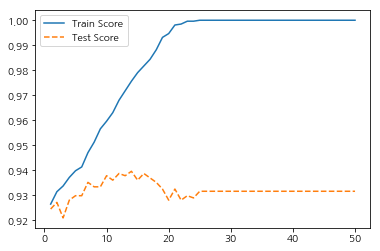

In [153]:
plt.plot(para_depth, train_accuracy, linestyle = '-', label = 'Train Score')
plt.plot(para_depth, test_accuracy, linestyle = '--', label = "Test Score")
plt.legend()

In [151]:
v_feature_name = df_train_x.columns

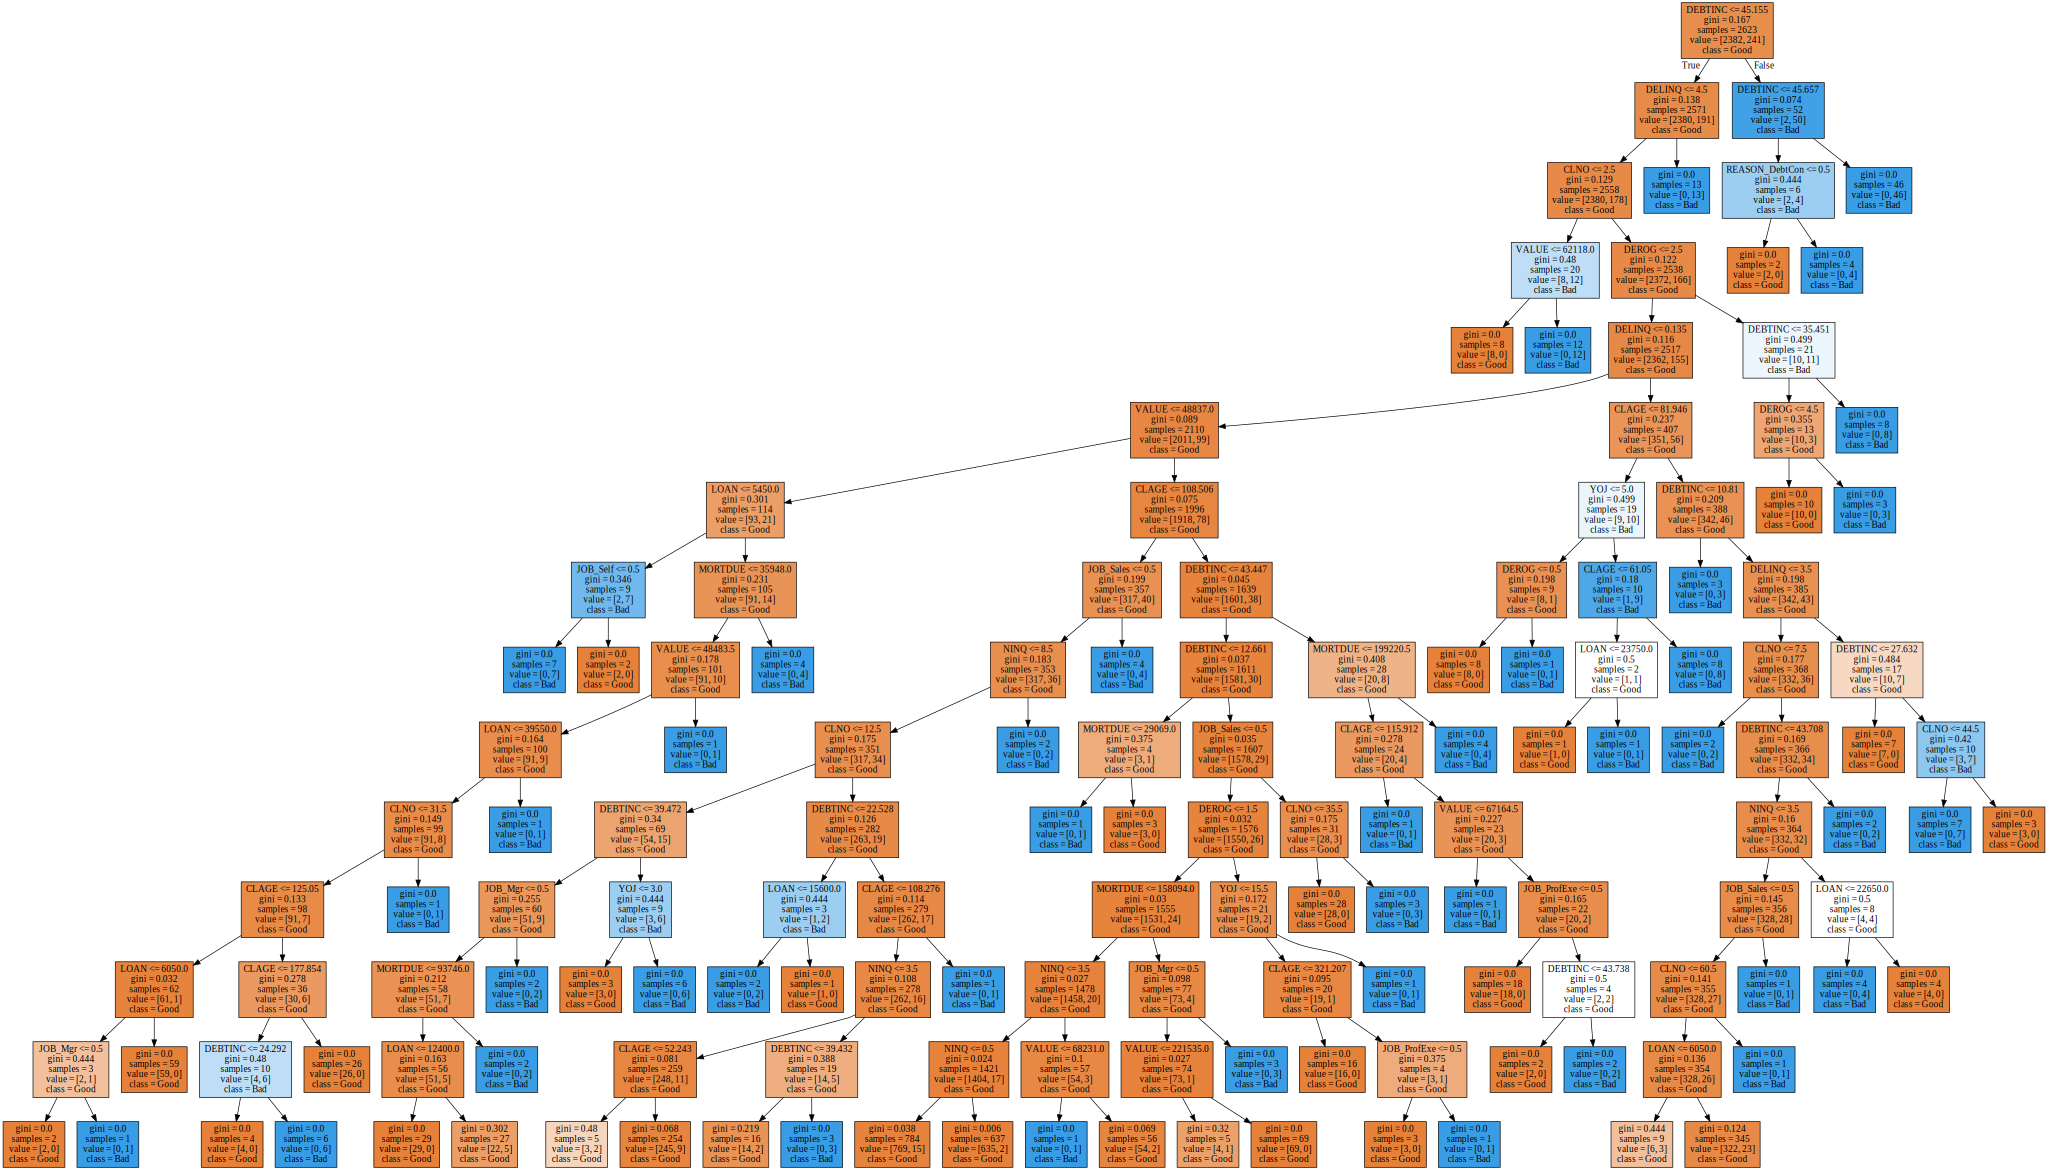

In [156]:
tree_low = DecisionTreeClassifier(random_state = 1234, max_depth=14)
tree_low.fit(df_train_x, df_train_y)
export_graphviz(tree_low, out_file = "tree_low.dot", class_names=["Good", "Bad"]
               ,feature_names=v_feature_name,impurity=True, filled=True)

with open("tree_low.dot") as f :
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [163]:
train_accuracy = []; test_accuracy = []

para_split = [n_split * 10 for n_split in range (1,11)]

for v_min_samples_split in para_split :
    tree = DecisionTreeClassifier(min_samples_split = v_min_samples_split, max_depth = 14, random_state = 1234)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_test_x, df_test_y))
    
df_accuracy_split = pd.DataFrame()
df_accuracy_split["MinSamplesSplit"] = para_split
df_accuracy_split["TrainAccuracy"] = train_accuracy
df_accuracy_split["TestAccuracy"] = test_accuracy


df_accuracy_split["D"] = df_accuracy_split["TrainAccuracy"]-df_accuracy_split["TestAccuracy"]

df_accuracy_split.round(3)

,MinSamplesSplit,TrainAccuracy,TestAccuracy,D
0,10,0.968,0.939,0.029
1,20,0.959,0.932,0.026
2,30,0.951,0.923,0.028
3,40,0.949,0.920,0.029
4,50,0.949,0.920,0.029
5,60,0.948,0.919,0.029
6,70,0.946,0.919,0.027
7,80,0.945,0.919,0.026
8,90,0.945,0.919,0.026
9,100,0.944,0.918,0.026


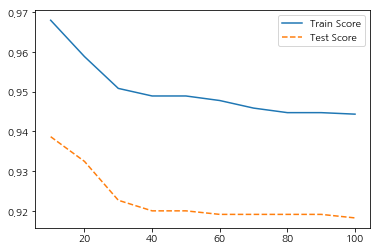

In [165]:
plt.plot(para_split, train_accuracy, linestyle = '-', label = 'Train Score')
plt.plot(para_split, test_accuracy, linestyle = '--', label = "Test Score")
plt.legend()

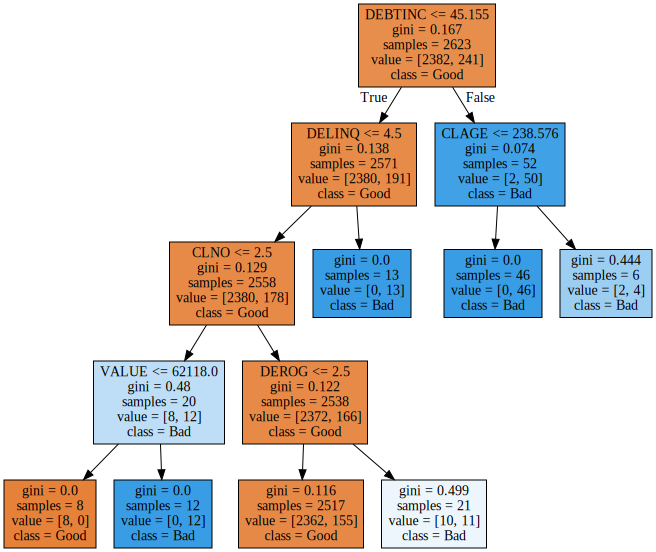

In [167]:
tree_low = DecisionTreeClassifier(random_state = 1234, max_depth=4, min_samples_split=20)
tree_low.fit(df_train_x, df_train_y)
export_graphviz(tree_low, out_file = "tree_low.dot", class_names=["Good", "Bad"]
               ,feature_names=v_feature_name,impurity=True, filled=True)

with open("tree_low.dot") as f :
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [168]:
train_accuracy = []; test_accuracy = []

para_leaf = [n_leaf * 2 for n_leaf in range (1,11)]

for v_min_samples_leaf in para_leaf :
    tree = DecisionTreeClassifier(min_samples_leaf = v_min_samples_leaf,min_samples_split = 20, max_depth = 14, random_state = 1234)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_test_x, df_test_y))
    
df_accuracy_leaf = pd.DataFrame()
df_accuracy_leaf["MinSamplesleaf"] = para_leaf
df_accuracy_leaf["TrainAccuracy"] = train_accuracy
df_accuracy_leaf["TestAccuracy"] = test_accuracy


df_accuracy_leaf["D"] = df_accuracy_leaf["TrainAccuracy"]-df_accuracy_leaf["TestAccuracy"]

df_accuracy_leaf.round(3)

,MinSamplesleaf,TrainAccuracy,TestAccuracy,D
0,2,0.957,0.933,0.023
1,4,0.953,0.932,0.022
2,6,0.952,0.925,0.026
3,8,0.948,0.919,0.029
4,10,0.950,0.917,0.032
5,12,0.938,0.915,0.024
6,14,0.936,0.917,0.019
7,16,0.936,0.919,0.016
8,18,0.935,0.922,0.013
9,20,0.934,0.920,0.014


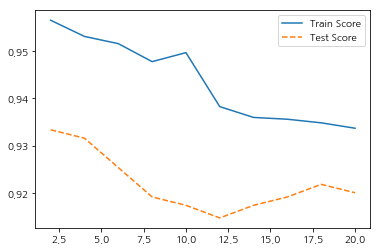

In [169]:
plt.plot(para_leaf, train_accuracy, linestyle = '-', label = 'Train Score')
plt.plot(para_leaf, test_accuracy, linestyle = '--', label = "Test Score")
plt.legend()

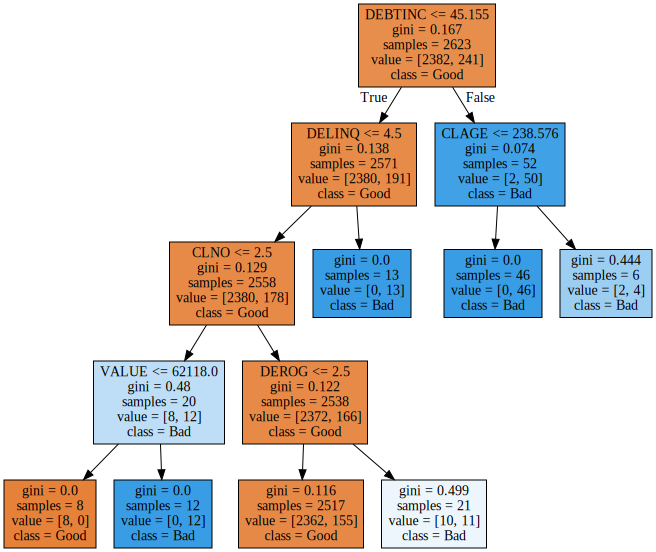

In [170]:
tree_low = DecisionTreeClassifier(random_state = 1234, max_depth=4, min_samples_split=20, min_samples_leaf=2)
tree_low.fit(df_train_x, df_train_y)
export_graphviz(tree_low, out_file = "tree_low.dot", class_names=["Good", "Bad"]
               ,feature_names=v_feature_name,impurity=True, filled=True)

with open("tree_low.dot") as f :
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [12]:
?DecisionTreeClassifier

Init signature:
DecisionTreeClassifier(
    criterion='gini',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    class_weight=None,
    presort=False,
)
Docstring:     
A decision tree classifier.

Read more in the :ref:`User Guide <tree>`.

Parameters
----------
criterion : string, optional (default="gini")
    The function to measure the quality of a split. Supported criteria are
    "gini" for the Gini impurity and "entropy" for the information gain.

splitter : string, optional (default="best")
    The strategy used to choose the split at each node. Supported
    strategies are "best" to choose the best split and "random" to choose
    the best random split.

max_depth : int or None, optional (default=None)
    The maximum depth of the tree. If None, then nodes are expanded unt

In [20]:
tree_final = DecisionTreeClassifier(criterion='gini', random_state = 1234, min_samples_split=10, min_samples_leaf=5)
tree_final.fit(df_train_x, df_train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=10,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1234,
            splitter='best')

In [21]:
y_pred = tree_final.predict(df_test_x)

print("Accuracy: {0:.3f}\n".format(tree_final.score(df_test_x, df_test_y)))
print("Confusion Matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))

Accuracy: 0.956

Confusion Matrix: 
[[16  0  0]
 [ 0 16  1]
 [ 0  1 11]]


In [174]:
estimator = DecisionTreeClassifier()

param_grid = {"max_depth":para_depth, "min_samples_split":para_split,
             "min_samples_leaf":para_leaf}

grid_dt = GridSearchCV(estimator, param_grid, scoring="accuracy", n_jobs = -1)
grid_dt.fit(df_train_x, df_train_y)

print("best estimator model: \n{}".format(grid_dt.best_estimator_))
print("\nbest parameter: \n{}".format(grid_dt.best_params_))
print("\nbest score:\n{}".format(grid_dt.best_score_.round(3)))

best estimator model: 
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=10,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

best parameter: 
{'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10}

best score:
0.936


In [ ]:
df_logistic_coef=pd.DataFrame({"Coef":scaled_log_result.params.values[1:]}, index=scaled_log_model.exog_names[1:])
df_logistic_coef.plot.barh(y='Coef', legend=False)